In [47]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [48]:
data = pd.read_csv('ThiTHPT2018.csv', low_memory=False)
data['KhoiD'] = data['Toan'] + data['Van'] + data['Anh']
data

,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,Unnamed: 10,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,Ma Tinh,Ten Tinh,Vung mien
0,1,3.0,3.75,3.0,NaN,NaN,NaN,3.0,6.50,8.25,NaN,NaN,NaN,13.25,9.75,NaN,18,Bac Giang,Mien Bac
1,2,8.8,7.50,9.0,NaN,NaN,NaN,6.0,9.00,8.25,NaN,NaN,NaN,22.50,25.30,NaN,18,Bac Giang,Mien Bac
2,3,6.0,5.50,4.0,5.75,5.50,5.00,NaN,NaN,NaN,NaN,17.25,16.50,NaN,15.50,15.75,18,Bac Giang,Mien Bac
3,4,3.4,5.75,2.6,NaN,NaN,NaN,3.5,4.75,7.25,NaN,NaN,NaN,14.00,11.75,NaN,18,Bac Giang,Mien Bac
4,5,3.8,6.75,3.0,NaN,NaN,NaN,3.5,6.25,8.00,NaN,NaN,NaN,16.50,13.55,NaN,18,Bac Giang,Mien Bac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744391,744392,4.6,4.50,6.0,3.75,3.00,3.25,NaN,NaN,NaN,NaN,11.35,10.85,NaN,15.10,14.35,52,Ba Ria Vung Tau,Mien Nam
744392,744393,7.0,6.00,5.0,5.25,5.50,4.00,NaN,NaN,NaN,NaN,17.75,16.50,NaN,18.00,17.25,52,Ba Ria Vung Tau,Mien Nam
744393,744394,5.2,3.50,4.0,6.25,5.50,2.25,NaN,NaN,NaN,NaN,16.95,12.95,NaN,12.70,15.45,52,Ba Ria Vung Tau,Mien Nam
744394,744395,7.8,4.50,5.4,7.50,6.25,3.00,NaN,NaN,NaN,NaN,21.55,17.05,NaN,17.70,20.70,52,Ba Ria Vung Tau,Mien Nam


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744396 entries, 0 to 744395
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SoBD         744396 non-null  int64  
 1   Toan         741024 non-null  float64
 2   Van          728309 non-null  float64
 3   Anh          659998 non-null  float64
 4   Ly           323353 non-null  float64
 5   Hoa          326981 non-null  float64
 6   Sinh         319605 non-null  float64
 7   Su           446118 non-null  float64
 8   Dia          433221 non-null  float64
 9   GDCD         379034 non-null  float64
 10  Unnamed: 10  0 non-null       float64
 11  KhoiA        321232 non-null  float64
 12  KhoiB        319516 non-null  float64
 13  KhoiC        432605 non-null  float64
 14  KhoiD        656138 non-null  float64
 15  KhoiA1       307864 non-null  float64
 16  Ma Tinh      744396 non-null  int64  
 17  Ten Tinh     744396 non-null  object 
 18  Vung mien    744396 non-

In [50]:
data.drop(columns='Unnamed: 10', inplace=True)

In [51]:
data.isna().sum()

SoBD              0
Toan           3372
Van           16087
Anh           84398
Ly           421043
Hoa          417415
Sinh         424791
Su           298278
Dia          311175
GDCD         365362
KhoiA        423164
KhoiB        424880
KhoiC        311791
KhoiD         88258
KhoiA1       436532
Ma Tinh           0
Ten Tinh          0
Vung mien         0
dtype: int64

In [52]:
data1 = data.fillna(0)
data1.isna().sum()

SoBD         0
Toan         0
Van          0
Anh          0
Ly           0
Hoa          0
Sinh         0
Su           0
Dia          0
GDCD         0
KhoiA        0
KhoiB        0
KhoiC        0
KhoiD        0
KhoiA1       0
Ma Tinh      0
Ten Tinh     0
Vung mien    0
dtype: int64

In [53]:
data1.describe()

,SoBD,Toan,Van,Anh,Ly,Hoa,Sinh,Su,Dia,GDCD,KhoiA,KhoiB,KhoiC,KhoiD,KhoiA1,Ma Tinh
count,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000,744396.000000
mean,372198.500000,4.862038,5.325812,3.487567,2.155052,2.136717,1.958364,2.280566,3.191265,3.644463,6.698968,6.491741,8.497977,12.792114,6.221027,30.321701
std,214888.759829,1.474314,1.636232,1.932636,2.658131,2.616922,2.400471,2.097805,2.869724,3.684780,8.050686,7.776030,7.625140,5.644006,7.735229,19.057832
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,186099.750000,3.800000,4.500000,2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,15.000000
50%,372198.500000,5.000000,5.500000,3.400000,0.000000,0.000000,0.000000,2.750000,4.250000,4.250000,0.000000,0.000000,11.250000,13.800000,0.000000,32.000000
75%,558297.250000,6.000000,6.500000,4.400000,4.500000,4.500000,4.250000,4.000000,5.750000,7.250000,14.900000,14.500000,15.000000,16.300000,14.050000,47.000000
max,744396.000000,10.000000,9.750000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,29.050000,29.550000,28.500000,27.850000,28.950000,64.000000


In [54]:
scores_A = data1.loc[:, ['Toan', 'Ly', 'Hoa','KhoiA']]
scores_A1 = data1.loc[:, ['Toan', 'Ly', 'Anh','KhoiA1']]
scores_B = data1.loc[:, ['Toan', 'Hoa', 'Sinh','KhoiB']]
scores_C = data1.loc[:, ['Van', 'Su', 'Dia','KhoiC']]
scores_D = data1.loc[:, ['Van', 'Toan', 'Anh','KhoiD']]

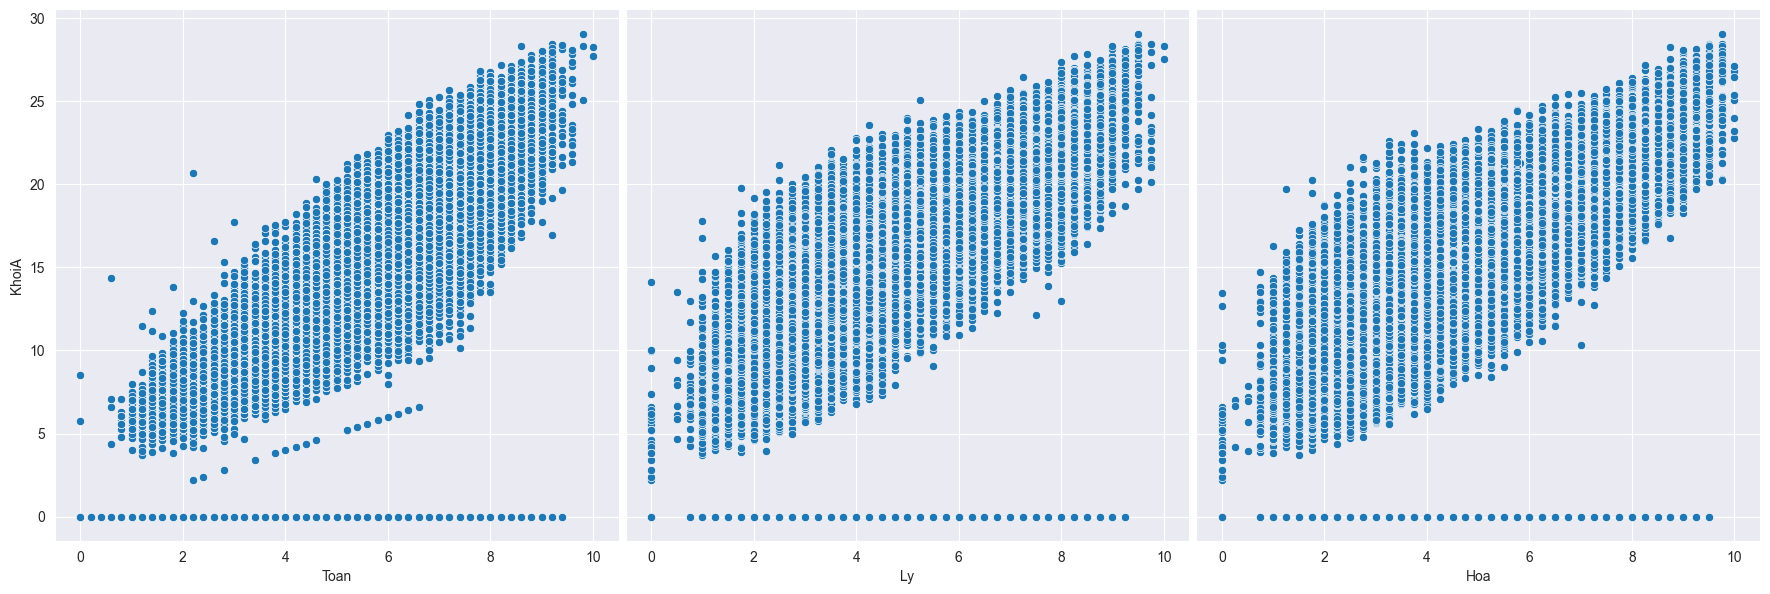

In [55]:
import seaborn

plt.figsize=(30, 10)
seaborn.pairplot(scores_A, x_vars=['Toan', 'Ly', 'Hoa'], y_vars=['KhoiA'],height=6, aspect=1)

In [56]:
scores_A = scores_A.values
scores_A

array([[ 3.  ,  0.  ,  0.  ,  0.  ],
       [ 8.8 ,  0.  ,  0.  ,  0.  ],
       [ 6.  ,  5.75,  5.5 , 17.25],
       ...,
       [ 5.2 ,  6.25,  5.5 , 16.95],
       [ 7.8 ,  7.5 ,  6.25, 21.55],
       [ 5.8 ,  6.25,  4.75, 16.8 ]])

In [57]:
clusters_A = 3
model = KMeans(init='k-means++', n_clusters=clusters_A, n_init=12)

In [58]:
model.fit(scores_A)
labels_A = model.labels_

In [59]:
scores_A = np.insert(scores_A, 4,values=labels_A, axis=1)
scores_A

array([[ 3.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 8.8 ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 6.  ,  5.75,  5.5 , 17.25,  1.  ],
       ...,
       [ 5.2 ,  6.25,  5.5 , 16.95,  1.  ],
       [ 7.8 ,  7.5 ,  6.25, 21.55,  1.  ],
       [ 5.8 ,  6.25,  4.75, 16.8 ,  1.  ]])

In [62]:
scores_A_df = pd.DataFrame(scores_A, columns= ['Toan','Ly','Hoa','KhoiA','ClustersA'])

In [65]:
from termcolor import colored

print(colored(scores_A_df.groupby('ClustersA').describe(), attrs=['bold']))

               Toan                                                      Ly  \
              count      mean       std  min  25%  50%  75%   max     count   
ClustersA                                                                     
0.0        424200.0  4.221626  1.322172  0.0  3.4  4.2  5.2   9.4  424200.0   
1.0        169156.0  6.468648  0.806125  2.2  6.0  6.4  7.0  10.0  169156.0   
2.0        151040.0  4.861344  1.016080  0.0  4.2  5.0  5.6   8.2  151040.0   

                     ...  Hoa            KhoiA                              \
               mean  ...  75%    max     count       mean       std    min   
ClustersA            ...                                                     
0.0        0.025721  ...  0.0   9.50  424200.0   0.010959  0.253256   0.00   
1.0        5.965489  ...  6.5  10.00  169156.0  18.279283  2.129456  15.30   
2.0        3.867869  ...  4.5   7.75  151040.0  12.513148  2.134399   6.05   

                                       
             25%

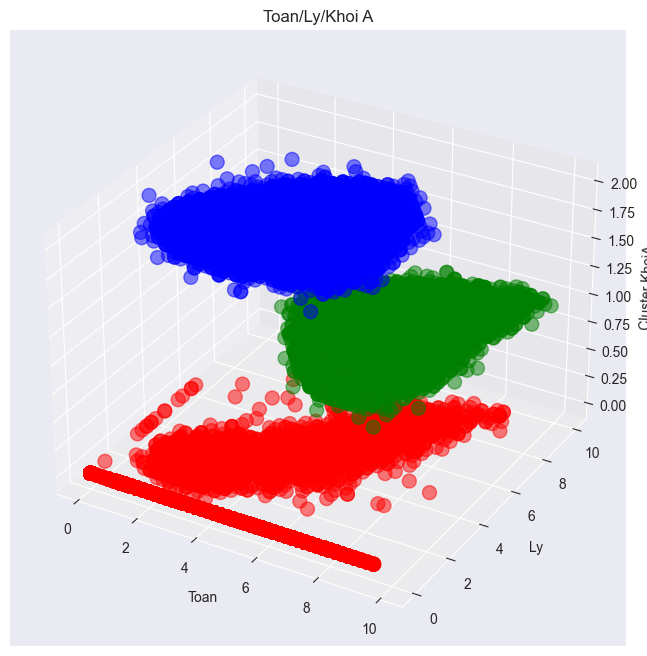

In [67]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Toan")
ax.set_ylabel("Ly")
ax.set_zlabel("Cluster KhoiA")
ax.set_title("Toan/Ly/Khoi A")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
    clustered_data = scores_A_df[scores_A_df['ClustersA'] == i]
    ax.scatter(clustered_data['Toan'], clustered_data['Ly'], clustered_data['ClustersA'], c=c, s=100, alpha=0.5)

plt.show()

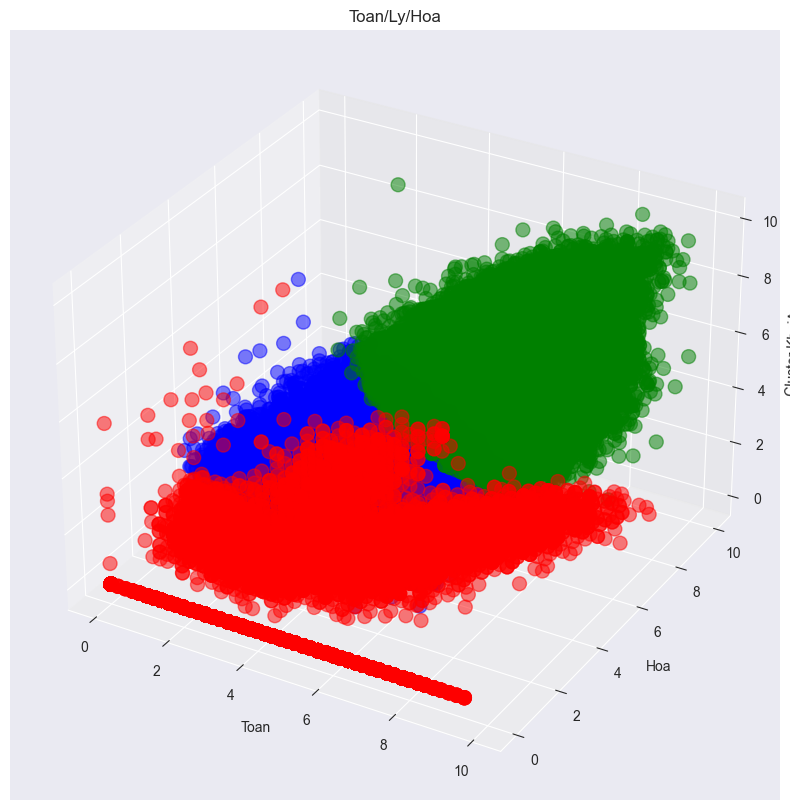

In [72]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel("Toan")
ax.set_ylabel("Hoa")
ax.set_zlabel("Cluster KhoiA")
ax.set_title("Toan/Ly/Hoa")

colors = ['r', 'g', 'b']

for i, c in enumerate(colors):
    clustered_data = scores_A_df[scores_A_df['ClustersA'] == i]
    ax.scatter(clustered_data['Toan'], clustered_data['Hoa'], clustered_data['Ly'], c=c, s=100, alpha=0.5)

plt.show()